# Life expectancy prediction from WHO data

### Importing Libraries

In [1]:
library(tidyverse)
library(janitor)
library(car)
library(lmtest)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'janitor' was built under R version 3.6.3"
Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Loading required package: carData

Attaching package: 'car'

The 

# Multiple linear regression 
It explains the relationship between multiple explanatory variables (X variables) and one dependent variable (Y). The dependent variable is modelled as a function of several independent variables with corresponding coefficients and constant terms. The regression model requires at least two or more predictor variables and other CLRM assumptions satisfied for it to be called multiple regression. Thus, the study undertaken performs a multiple linear regression analysis on the dataset, ‘WHO Statistics on Life Expectancy’ and further runs a regression diagnostic to check for issues like multicollinearity, heteroscedasticity, and autocorrelation. 

In [2]:
df <- read_csv("life_expectancy_data_from_who.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character(),
  Status = col_character()
)
See spec(...) for full column specifications.


According to the dataset, **‘WHO Statistics on Life Expectancy’**, the life expectancy of a person living in a particular country will be dependent on various factors like adult mortality rates, infant deaths, alcohol consumption per capita, country’s expenditure on health, immunization coverage, BMI, deaths under 5-years-old, deaths due to HIV/AIDS, GDP, population, body condition, income information, and education. 
Thus, the dependent variable (Y) here is assumed to be life expectancy which depends on 18 explanatory/independent variables (Xi) as follows:


In [3]:
head(df)

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [4]:
names(df)

[1] "Country"                         "Year"                           
 [3] "Status"                          "Life expectancy"                
 [5] "Adult Mortality"                 "infant deaths"                  
 [7] "Alcohol"                         "percentage expenditure"         
 [9] "Hepatitis B"                     "Measles"                        
[11] "BMI"                             "under-five deaths"              
[13] "Polio"                           "Total expenditure"              
[15] "Diphtheria"                      "HIV/AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness  1-19 years"            "thinness 5-9 years"             
[21] "Income composition of resources" "Schooling"

In [5]:
glimpse(df)

Rows: 2,938
Columns: 22
$ Country                           <chr> "Afghanistan", "Afghanistan", "Afgha~
$ Year                              <dbl> 2015, 2014, 2013, 2012, 2011, 2010, ~
$ Status                            <chr> "Developing", "Developing", "Develop~
$ `Life expectancy`                 <dbl> 65.0, 59.9, 59.9, 59.5, 59.2, 58.8, ~
$ `Adult Mortality`                 <dbl> 263, 271, 268, 272, 275, 279, 281, 2~
$ `infant deaths`                   <dbl> 62, 64, 66, 69, 71, 74, 77, 80, 82, ~
$ Alcohol                           <dbl> 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, ~
$ `percentage expenditure`          <dbl> 71.279624, 73.523582, 73.219243, 78.~
$ `Hepatitis B`                     <dbl> 65, 62, 64, 67, 68, 66, 63, 64, 63, ~
$ Measles                           <dbl> 1154, 492, 430, 2787, 3013, 1989, 28~
$ BMI                               <dbl> 19.1, 18.6, 18.1, 17.6, 17.2, 16.7, ~
$ `under-five deaths`               <dbl> 83, 86, 89, 93, 97, 102, 106, 110, 1~
$ Polio         

In [6]:
clean_names(df)
names(df)

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2
Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,...,63,9.42,63,0.1,445.89330,284331,18.6,18.7,0.434,8.9
Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,...,64,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7
Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,...,63,6.73,63,0.1,369.83580,26616792,19.0,19.1,0.415,8.4
Afghanistan,2006,Developing,57.3,295,84,0.03,17.171518,64,1990,...,58,7.43,58,0.1,272.56377,2589345,19.2,19.3,0.405,8.1


[1] "Country"                         "Year"                           
 [3] "Status"                          "Life expectancy"                
 [5] "Adult Mortality"                 "infant deaths"                  
 [7] "Alcohol"                         "percentage expenditure"         
 [9] "Hepatitis B"                     "Measles"                        
[11] "BMI"                             "under-five deaths"              
[13] "Polio"                           "Total expenditure"              
[15] "Diphtheria"                      "HIV/AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness  1-19 years"            "thinness 5-9 years"             
[21] "Income composition of resources" "Schooling"

In [7]:
df2 = df[,4:22]
head(df2)

Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
58.8,279,74,0.01,79.679367,66,1989,16.7,102,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


# Fitting a regression model

In [8]:
df1 = df2 %>%
clean_names()
model = lm(life_expectancy ~ .,data = df1)
summary(model)


Call:
lm(formula = life_expectancy ~ ., data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0176  -2.0454  -0.0185   2.2260  11.9157 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.328e+01  7.358e-01  72.412  < 2e-16 ***
adult_mortality                 -1.689e-02  9.473e-04 -17.828  < 2e-16 ***
infant_deaths                    9.369e-02  1.068e-02   8.776  < 2e-16 ***
alcohol                         -5.435e-02  3.061e-02  -1.776   0.0760 .  
percentage_expenditure           3.777e-04  1.805e-04   2.093   0.0365 *  
hepatitis_b                     -5.582e-03  4.446e-03  -1.256   0.2095    
measles                         -8.617e-06  1.081e-05  -0.797   0.4253    
bmi                              3.350e-02  6.011e-03   5.573 2.92e-08 ***
under_five_deaths               -7.047e-02  7.728e-03  -9.119  < 2e-16 ***
polio                            7.836e-03  5.163e-03   1.518   0.1293    
tot

# Inference
In the above multiple regression function, some of the regressors’ coefficients have negative value indicating an inverse effect on life expectancy. Also, p-value > 0.05 (level of significance) of variables like ‘percentage expenditure’, ‘measles’, ‘population’, ‘Hepatitis B’, ‘thinness under 1 to 19 years’, and ‘thinness under 59 years.’ Thus, making all these variables statistically insignificant. 

# Test for multicollinearity using library 'car' 

In [9]:
vif(model)

adult_mortality                   infant_deaths 
                       1.795984                      212.177699 
                        alcohol          percentage_expenditure 
                       1.938381                       12.847295 
                    hepatitis_b                         measles 
                       1.651864                        1.514114 
                            bmi               under_five_deaths 
                       1.796920                      201.999311 
                          polio               total_expenditure 
                       1.712620                        1.118562 
                     diphtheria                        hiv_aids 
                       2.092936                        1.482079 
                            gdp                      population 
                      13.516874                        1.943391 
            thinness_1_19_years              thinness_5_9_years 
                       7.602562                        7.584519 
income_composition_of_resources                       schooling 
                       2.971489                        3.512993

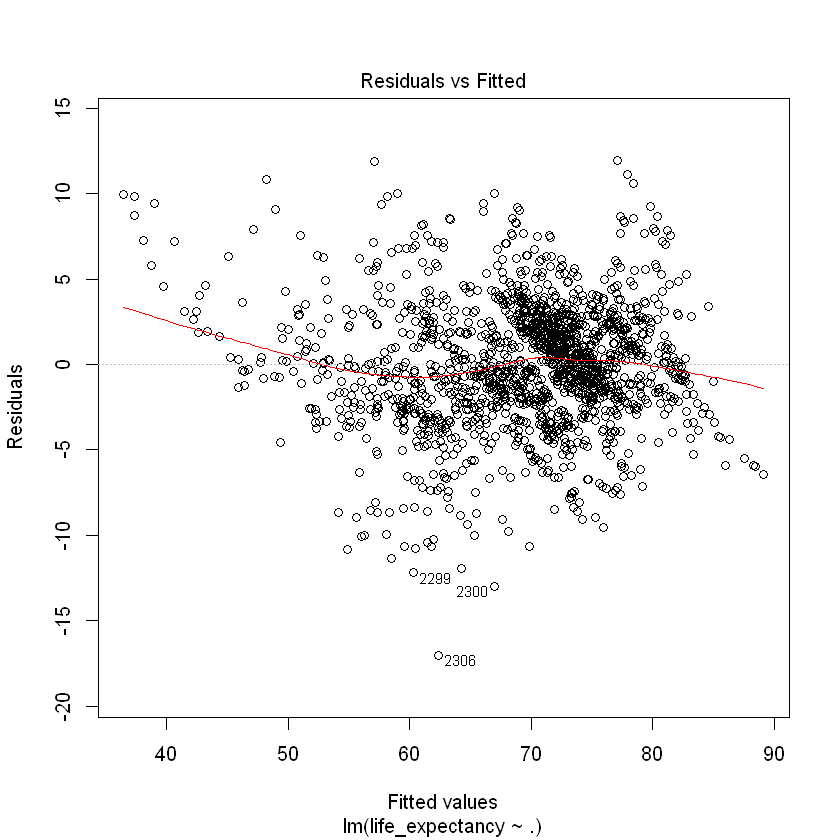

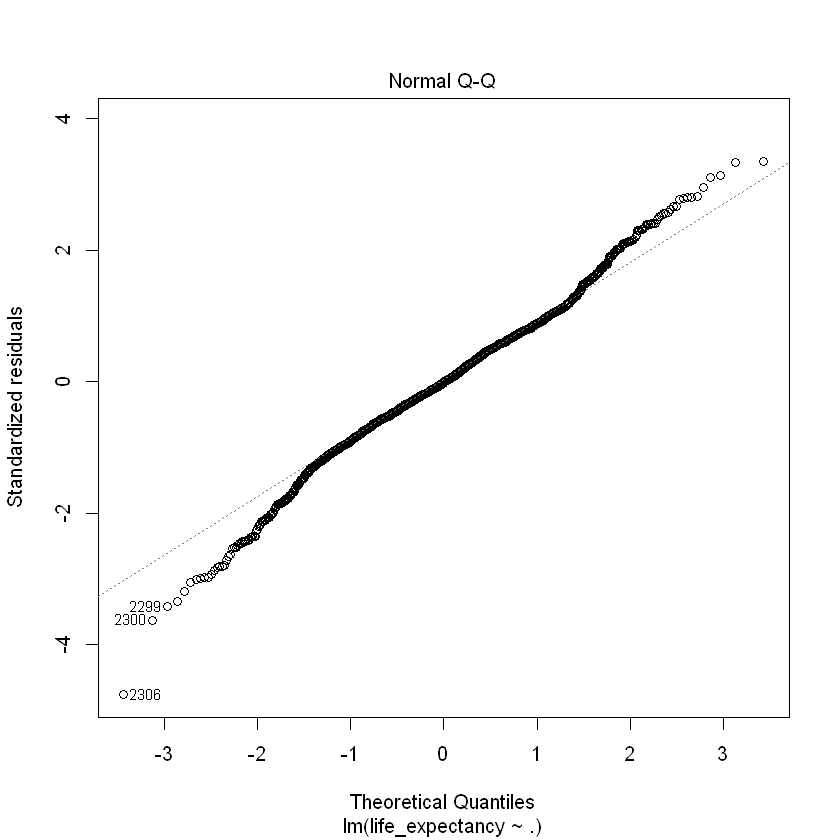

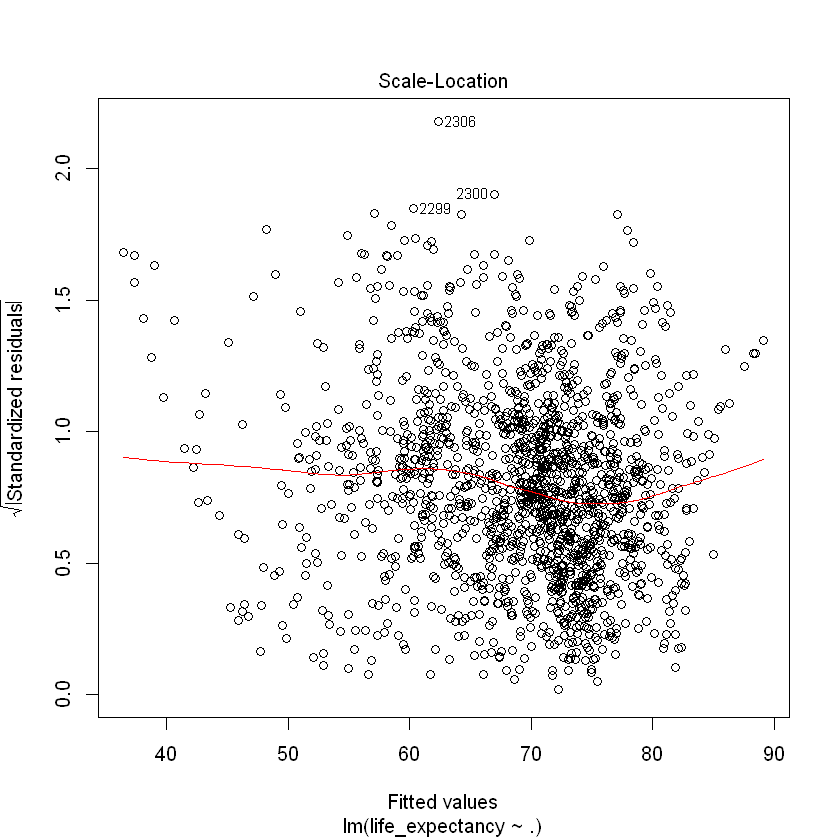

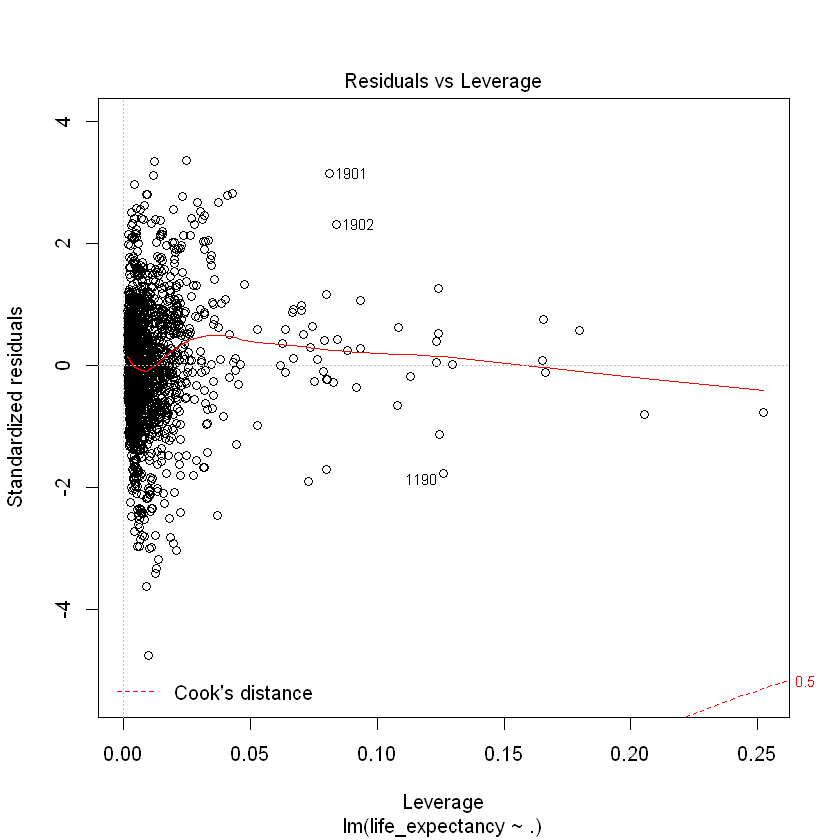

In [10]:
plot(model)

In [11]:
names(df)

[1] "Country"                         "Year"                           
 [3] "Status"                          "Life expectancy"                
 [5] "Adult Mortality"                 "infant deaths"                  
 [7] "Alcohol"                         "percentage expenditure"         
 [9] "Hepatitis B"                     "Measles"                        
[11] "BMI"                             "under-five deaths"              
[13] "Polio"                           "Total expenditure"              
[15] "Diphtheria"                      "HIV/AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness  1-19 years"            "thinness 5-9 years"             
[21] "Income composition of resources" "Schooling"

In [12]:
names(df) = gsub(" ", "", names(df))#names to extract columns
names(df) = gsub("/", "", names(df))
names(df) = gsub("-", "", names(df))

In [13]:
names(df)

[1] "Country"                      "Year"                        
 [3] "Status"                       "Lifeexpectancy"              
 [5] "AdultMortality"               "infantdeaths"                
 [7] "Alcohol"                      "percentageexpenditure"       
 [9] "HepatitisB"                   "Measles"                     
[11] "BMI"                          "underfivedeaths"             
[13] "Polio"                        "Totalexpenditure"            
[15] "Diphtheria"                   "HIVAIDS"                     
[17] "GDP"                          "Population"                  
[19] "thinness119years"             "thinness59years"             
[21] "Incomecompositionofresources" "Schooling"

In [14]:
head(df)

Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIVAIDS,GDP,Population,thinness119years,thinness59years,Incomecompositionofresources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


# Cleaning the data

In [15]:
df <- df[!is.na(df$Totalexpenditure), ]
df <- df[!is.na(df$HepatitisB), ]
df <- df[!is.na(df$AdultMortality), ]
df <- df[!is.na(df$infantdeaths), ]
df <- df[!is.na(df$Alcohol), ]
df <- df[!is.na(df$percentageexpenditure), ]
df <- df[!is.na(df$Measles), ]
df <- df[!is.na(df$BMI), ]
df <- df[!is.na(df$underfivedeaths), ]
df <- df[!is.na(df$Polio), ]
df <- df[!is.na(df$Diphtheria), ]
df <- df[!is.na(df$HIVAIDS), ]
df <- df[!is.na(df$GDP), ]
df <- df[!is.na(df$Population), ]
df <- df[!is.na(df$thinness119years), ]
df <- df[!is.na(df$thinness59years), ]
df <- df[!is.na(df$Incomecompositionofresources), ]
df <- df[!is.na(df$Schooling), ]



In [16]:
head(df)

Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIVAIDS,GDP,Population,thinness119years,thinness59years,Incomecompositionofresources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [17]:
names(df)

[1] "Country"                      "Year"                        
 [3] "Status"                       "Lifeexpectancy"              
 [5] "AdultMortality"               "infantdeaths"                
 [7] "Alcohol"                      "percentageexpenditure"       
 [9] "HepatitisB"                   "Measles"                     
[11] "BMI"                          "underfivedeaths"             
[13] "Polio"                        "Totalexpenditure"            
[15] "Diphtheria"                   "HIVAIDS"                     
[17] "GDP"                          "Population"                  
[19] "thinness119years"             "thinness59years"             
[21] "Incomecompositionofresources" "Schooling"

# Cleaning the data by using 'filter' function

In [18]:
df1 = df %>%
filter(!is.na(Lifeexpectancy),
       !is.na(AdultMortality),
      !is.na(infantdeaths),
      !is.na(Alcohol),
      !is.na(percentageexpenditure),
      !is.na(HepatitisB),
      !is.na(Measles),
      !is.na(BMI),
      !is.na(underfivedeaths),
      !is.na(Totalexpenditure),
      !is.na(Diphtheria),
      !is.na(HIVAIDS),
      !is.na(GDP),
      !is.na(Population),
      !is.na(GDP),
      !is.na(thinness119years),
      !is.na(thinness59years),
      !is.na(Incomecompositionofresources),
      !is.na(Schooling))
summary(df1)

   Country               Year         Status          Lifeexpectancy
 Length:1649        Min.   :2000   Length:1649        Min.   :44.0  
 Class :character   1st Qu.:2005   Class :character   1st Qu.:64.4  
 Mode  :character   Median :2008   Mode  :character   Median :71.7  
                    Mean   :2008                      Mean   :69.3  
                    3rd Qu.:2011                      3rd Qu.:75.0  
                    Max.   :2015                      Max.   :89.0  
 AdultMortality   infantdeaths        Alcohol       percentageexpenditure
 Min.   :  1.0   Min.   :   0.00   Min.   : 0.010   Min.   :    0.00     
 1st Qu.: 77.0   1st Qu.:   1.00   1st Qu.: 0.810   1st Qu.:   37.44     
 Median :148.0   Median :   3.00   Median : 3.790   Median :  145.10     
 Mean   :168.2   Mean   :  32.55   Mean   : 4.533   Mean   :  698.97     
 3rd Qu.:227.0   3rd Qu.:  22.00   3rd Qu.: 7.340   3rd Qu.:  509.39     
 Max.   :723.0   Max.   :1600.00   Max.   :17.870   Max.   :18961.35     

In [19]:
head(df1)

Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIVAIDS,GDP,Population,thinness119years,thinness59years,Incomecompositionofresources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [20]:
names(df1)

[1] "Country"                      "Year"                        
 [3] "Status"                       "Lifeexpectancy"              
 [5] "AdultMortality"               "infantdeaths"                
 [7] "Alcohol"                      "percentageexpenditure"       
 [9] "HepatitisB"                   "Measles"                     
[11] "BMI"                          "underfivedeaths"             
[13] "Polio"                        "Totalexpenditure"            
[15] "Diphtheria"                   "HIVAIDS"                     
[17] "GDP"                          "Population"                  
[19] "thinness119years"             "thinness59years"             
[21] "Incomecompositionofresources" "Schooling"

# Fitting a regression model

In [21]:
fit1 <- lm(df1$Lifeexpectancy ~ df1$Alcohol+ df1$AdultMortality + df1$infantdeaths + 
           df1$percentageexpenditure + df1$Measles + df1$BMI + df1$Polio + 
           df1$Incomecompositionofresources + df1$Population + df1$GDP + 
           df1$HepatitisB + df1$underfivedeaths + df1$Totalexpenditure + df1$Diphtheria +
           df1$HIVAIDS + df1$thinness119years + df1$thinness59years)
summary(fit1)


Call:
lm(formula = df1$Lifeexpectancy ~ df1$Alcohol + df1$AdultMortality + 
    df1$infantdeaths + df1$percentageexpenditure + df1$Measles + 
    df1$BMI + df1$Polio + df1$Incomecompositionofresources + 
    df1$Population + df1$GDP + df1$HepatitisB + df1$underfivedeaths + 
    df1$Totalexpenditure + df1$Diphtheria + df1$HIVAIDS + df1$thinness119years + 
    df1$thinness59years)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6374  -2.2322   0.0112   2.2062  14.1422 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       5.796e+01  7.074e-01  81.936  < 2e-16 ***
df1$Alcohol                       7.824e-02  3.116e-02   2.511  0.01213 *  
df1$AdultMortality               -1.842e-02  1.002e-03 -18.378  < 2e-16 ***
df1$infantdeaths                  1.005e-01  1.136e-02   8.846  < 2e-16 ***
df1$percentageexpenditure         2.283e-04  1.918e-04   1.190  0.23422    
df1$Measles                      -1.262e-0

# Inference
In the above multiple regression function, some of the regressors’ coefficients have negative value indicating an inverse effect on life expectancy. Also, p-value > 0.05 (level of significance) of variables like ‘percentage expenditure’, ‘measles’, ‘population’, ‘Hepatitis B’, ‘thinness under 1 to 19 years’, and ‘thinness under 59 years.’ Thus, making all these variables statistically insignificant. 

#  Test for multicollinearity

# VIF: Variance Inflation Factor
It is a tool to identify multicollinearity. It shows how the variance of the estimator is inflated due to multicollinearity issue. Thus, the VIF values calculated by using R software for various explanatory variables in the model are as follows: 


In [22]:
data.frame(vif(fit1))

,vif.fit1.
df1$Alcohol,1.772066
df1$AdultMortality,1.774429
df1$infantdeaths,211.787914
df1$percentageexpenditure,12.807040
df1$Measles,1.513165
df1$BMI,1.727690
df1$Polio,1.701056
df1$Incomecompositionofresources,2.225360
df1$Population,1.934176
df1$GDP,13.406771


# Inference
According to rule of thumb, VIF = 3 is ideal situation with no issue of multicollinearity, VIF value ranging from 1 to 10 indicates no issues even if multicollinearity (in some degree) exist in the model. However, if the value of VIF >10 then it is not justifiable and there is a problem of multicollinearity in the model. 
As per the output obtained above, we see most of the VIF values for different variables is ranging between 1 to 10, which means these variables are not responsible for causing multicollinearity in the model. However, there are two variables, i.e., 'under five deaths' and 'infant deaths' with significantly high VIF values pointing out that there are ones majorly responsible for causing the problem of multicollinarity in the regression model. 
Also, looking at the nature of these two variables, we can also make out that there are high chances that number of infant deaths will affect have an impact on deaths under the age of five. 

# Remedial measures:
1. Dropping the variable (s) and specification bias: One way to correct the problem is by dropping variables causing multicollinearity from the model. 
For instance, in our fitted regression model, as per the analysis and VIF values, we can resolve the issue by dropping variables like ‘infants’ deaths’ and ‘under 5 deaths’. However, by doing so we may be committing specification bias if the variables are important for analysis. 
2. Additional or new data: Multicollinearity is a sample feature, thus sometimes by taking another sample with same variables, collinearity may not be a problem. Or, by simply increasing the sample size.


# Test for heteroscedasticity: Breush-Pagan test 

**Ho : No hetroscedasticity
H1 : Hetroscedasticity**

In [23]:
bptest(fit1)


	studentized Breusch-Pagan test

data:  fit1
BP = 414.66, df = 17, p-value < 2.2e-16


# Inference
Since, p-value (2.2e -16) < 0.05 (level of significance), we reject the null hypothesis and say that the regression model has the issue of heteroscedasticity, i.e., the variance of error terms is not constant. 

# Remedial Measures: 
1. Instead of using OLS estimators, we will have to use generalised least squares method (GLS estimators). 
2. If standard error of the error term is given then we can use weighted standard error. 
3. Taking logarithms of the data points. 


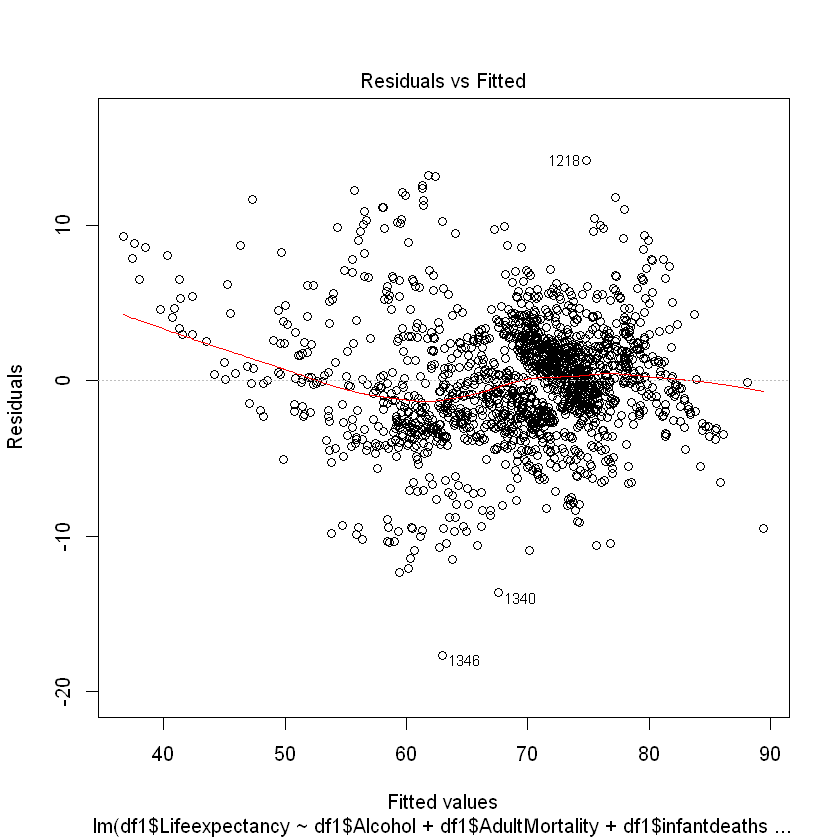

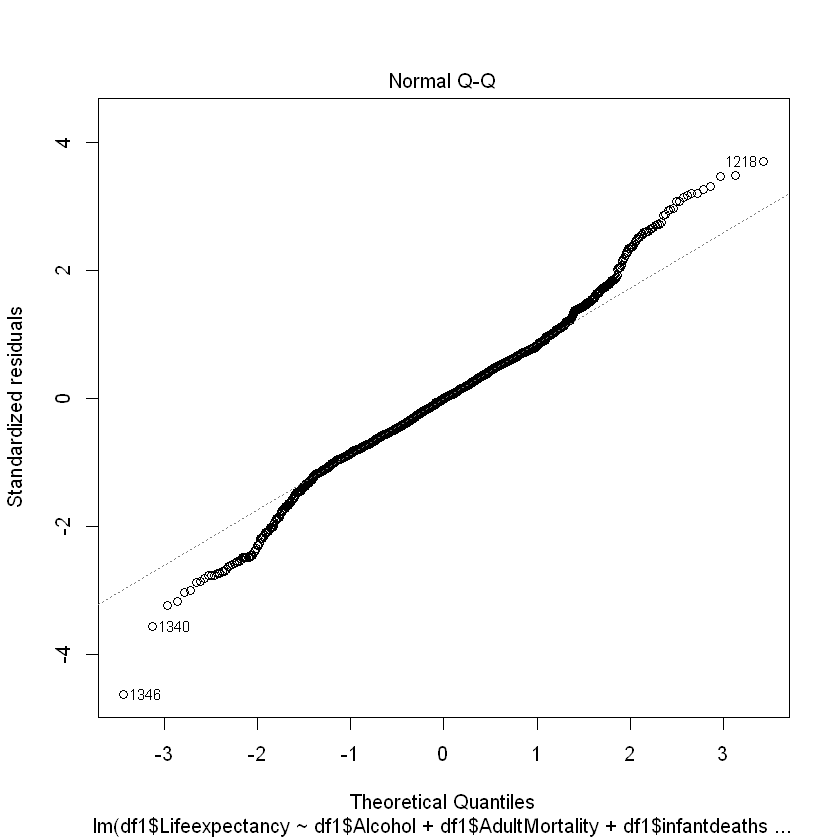

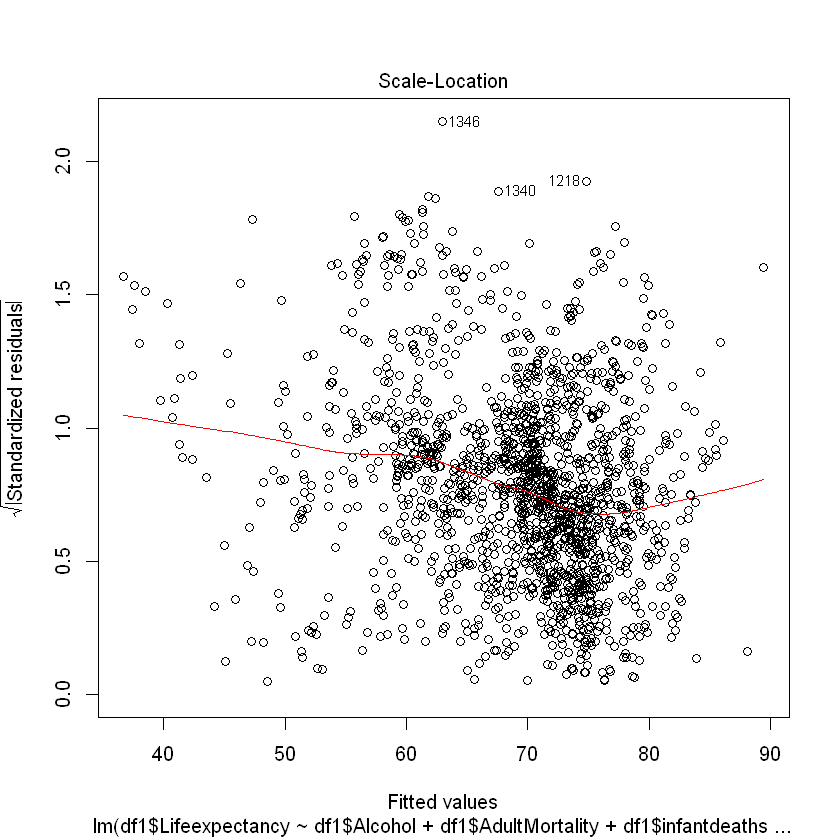

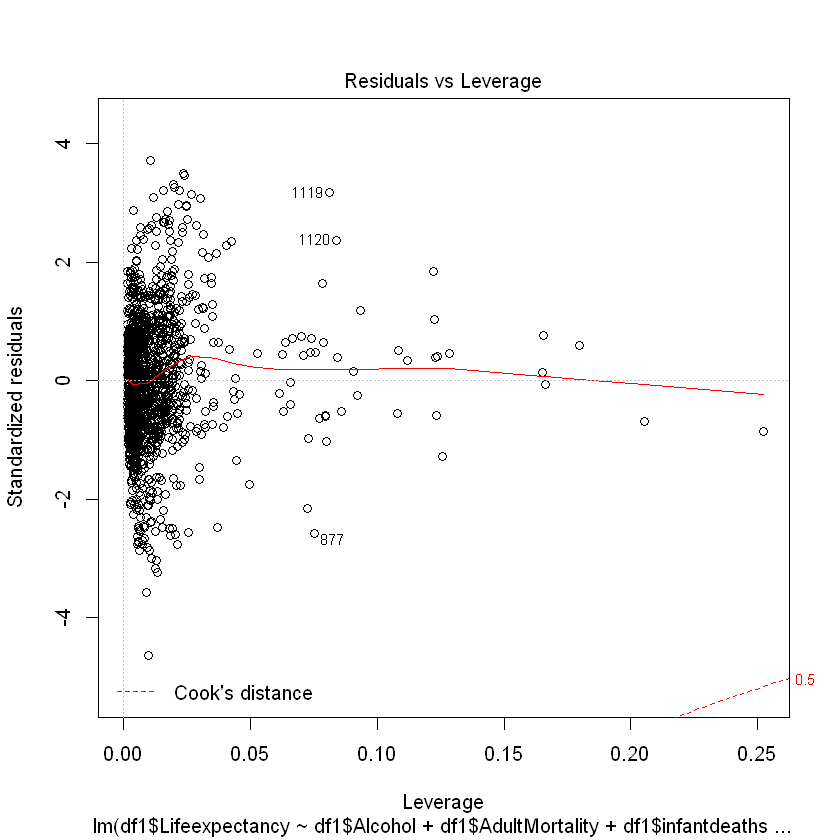

In [24]:
plot(fit1)

# Inference
The graphs that we are interested in for checking hetroscedasticity is the chart of '**residuals vs fitted values**' and the **'standardised residuals on Y axis'**. If there is no presence of hetroscedasticity, then there will be equal distribution of points throughtout the range of X values and a flat red line. 
But, in the above case as one can see in both the plots, the red line is slightly curved and the residuals seem to increase as the fitted Y values increase. So, the inference is that there is **presence of hetroscedasticity** in the model. 

# Test for Autocorrelation: Durbin Watson test


**Ho: There is no correlation among the residuals.
H1: The residuals are autocorrelated.**

In [25]:
durbinWatsonTest(fit1)

 lag Autocorrelation D-W Statistic p-value
   1        0.612734     0.7706071       0
 Alternative hypothesis: rho != 0

# Inference
From the output obtained above, we can see that the test statistic is 0.7706071 and the corresponding p value is 0. Since, the p-value is less than 0.05, we reject the null hypothesis and conclude that the **residuals (error terms) are autocorrelated.**
Also, the value of D-W statistic is approx. 0.8 which is close to 0 showing high chances of high positive autocorrelation. 

# Remedial Measures
1. If the source of autocorrelation is excluded variable specification bias, then the problem can be solved by including those explanatory variables in the model. 
2. If the problem is due to wrong functional form, then correct by using the right functional form. 
3. Cochrane Orcult procedure. 


# Conclusion:
The WHO data on life expectancy was analysed by using multiple regression, and part of the process involved checking to make sure that the data can actually be analysed using multiple regression. And, it is only appropriate to use multiple regression if the data passes few of the CLRM assumptions like multicollinearity, heteroscedasticity and autocorrelation that are required for regression to give you a valid result. Thus, regression diagnostics was run to ensure no such issue in the model and if detected suitable remedial measures were provided. 

